In [2]:
import xarray as xr
import numpy as np
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.transform_xy import geo2imagexy 
from osgeo import gdal


In [5]:
path_s3l2_subs = 'data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement_readout_subs.h5'
path_rsimg = 'data/rs-img/dianchi_s2_20200511_wgs84.tif'
path_rsimg_wat = 'data/water_mask/dianchi_s2_20200511_wat_wgs84.tif'


In [6]:
s2_img, s2_img_info = readTiff(path_rsimg)
s2_img_wat, s2_img_wat_info = readTiff(path_rsimg_wat)
s3_l2_subs = xr.open_dataset(path_s3l2_subs)
col_fps, row_fps = geo2imagexy(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], gdal_trans=s2_img_info['geotrans'])



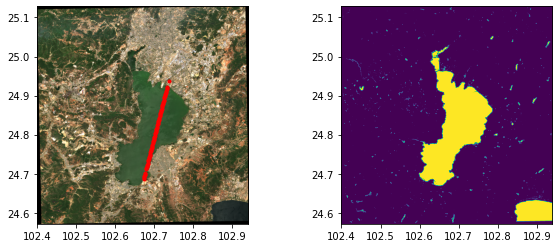

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
imgShow(s2_img, extent=s2_img_info['geoextent'])
plt.plot(s3_l2_subs['lon_20_ku'], s3_l2_subs['lat_20_ku'], 'r.')
plt.subplot(122)
plt.imshow(s2_img_wat, extent=s2_img_wat_info['geoextent'])


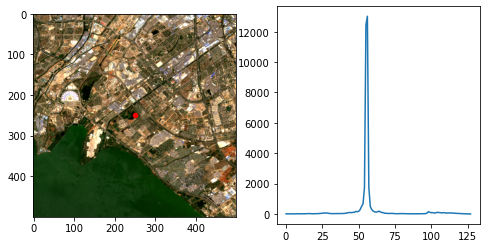

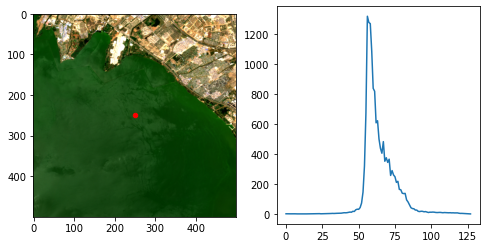

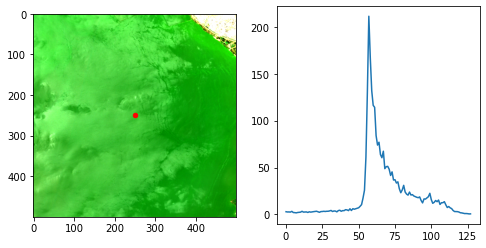

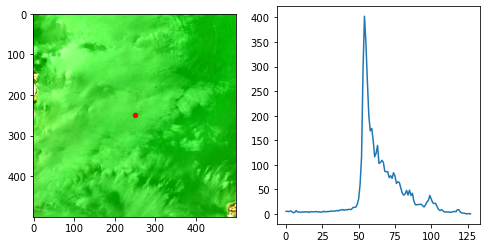

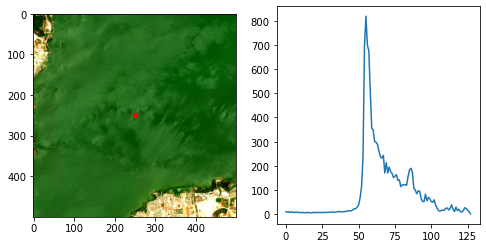

In [8]:
width_window = 501        ## 500 pixel
radius = int(width_window/2)
row_fps, col_fps = geo2imagexy(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], gdal_trans=s2_img_info['geotrans'])

for ind in range(0,50,10):
    s2_subs = s2_img[row_fps[ind]-radius:row_fps[ind]+radius, col_fps[ind]-radius:col_fps[ind]+radius, :]  # image window 
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    imgShow(s2_subs)
    plt.scatter(x=radius, y=radius, s=20, color='r') 
    plt.subplot(1,2,2)
    plt.plot(s3_l2_subs['waveform_20_ku'][ind,:])


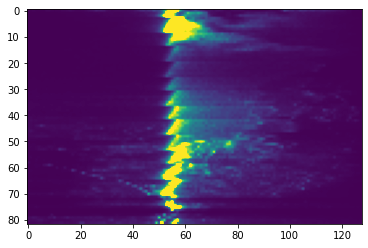

In [9]:
fig_2 = plt.figure(figsize=(6, 6))
waveform_20_ku = s3_l2_subs.variables["waveform_20_ku"]
plt.imshow(waveform_20_ku, vmin=0, vmax=800)
